In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
data = pd.read_csv('Retail Sales.csv', parse_dates=['DATE'])
data.head()

,DATE,Sales
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [ ]:
data['DATE'] = data['DATE'].dt.date

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    352 non-null    object
 1   Sales   352 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
data['DATE'].min(), data['DATE'].max()

(datetime.date(1992, 1, 1), datetime.date(2021, 4, 1))

In [ ]:
data.tail(10)

,DATE,Sales
342,2020-07-01,6106
343,2020-08-01,5813
344,2020-09-01,5582
345,2020-10-01,5766
346,2020-11-01,5796
347,2020-12-01,7366
348,2021-01-01,5087
349,2021-02-01,4968
350,2021-03-01,5727
351,2021-04-01,5712


In [ ]:
data.describe()

,Sales
count,352.000000
mean,3122.267045
std,1129.410411
min,1501.000000
25%,2140.000000
50%,2986.500000
75%,3804.750000
max,7366.000000


In [ ]:
data['DATE'].nunique()

352

In [ ]:
data_series = pd.Series(data['Sales'].values, index=pd.date_range('1992-01-01', periods= 352, freq='M' ))

<AxesSubplot:>

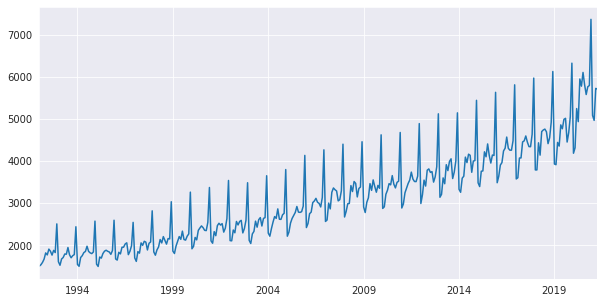

In [ ]:
plt.figure(figsize=(10,5))
data_series.plot()

<AxesSubplot:>

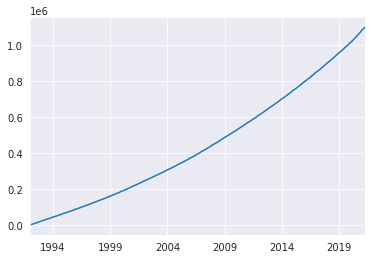

In [ ]:
cumsum_series = np.cumsum(data_series)
cumsum_series.plot()

In [ ]:
def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    df_test = adfuller(timeseries,autolag = 'AIC')
    df_output = pd.Series(df_test[0:4],index= ['Test statistics', 'p-value', 'Number of lags used', 'Number of observations used'])
    print(df_output)

In [ ]:
!pip install statsmodels==0.12.2

  Using cached statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
causalimpact 0.2.0 requires statsmodels==0.11.0, but you have statsmodels 0.12.2 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
stationarity_test(data_series)

Test statistics                  2.263311
p-value                          0.998931
Number of lags used             16.000000
Number of observations used    335.000000
dtype: float64


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

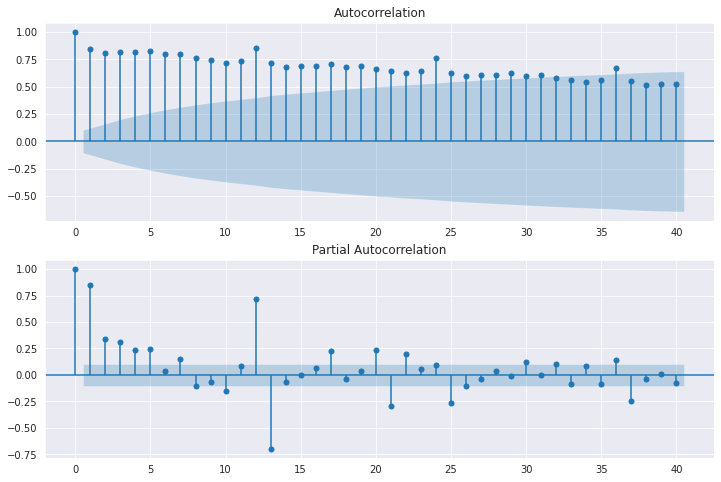

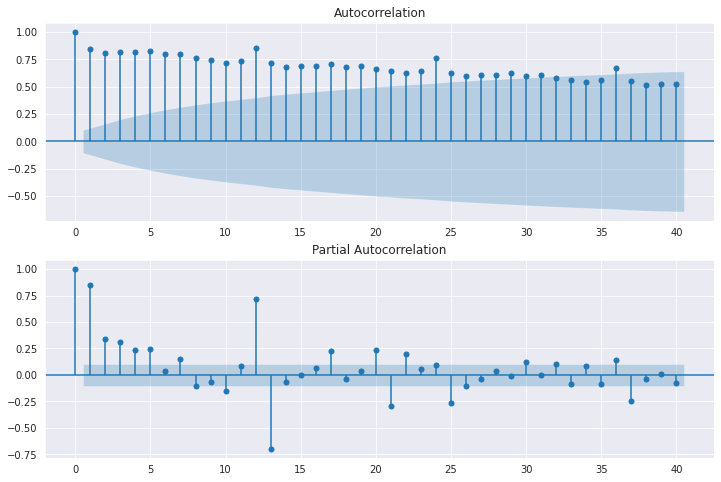

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (12,8))
plot_acf(data_series, lags=40, ax=ax1)
plot_pacf(data_series, lags=40, ax=ax2)

In [ ]:
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods=1).mean()
    rol_std = timeseries.rolling(window, min_periods=1).std()

    fig = plt.figure(figsize=(12,8))
    og = plt.plot(timeseries, color = 'blue', label='Original')
    mean = plt.plot(rol_mean, color='red', label = 'Rolling Mean')
    std = plt.plot(rol_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation (window = ' + str(window)+')')
    plt.show()

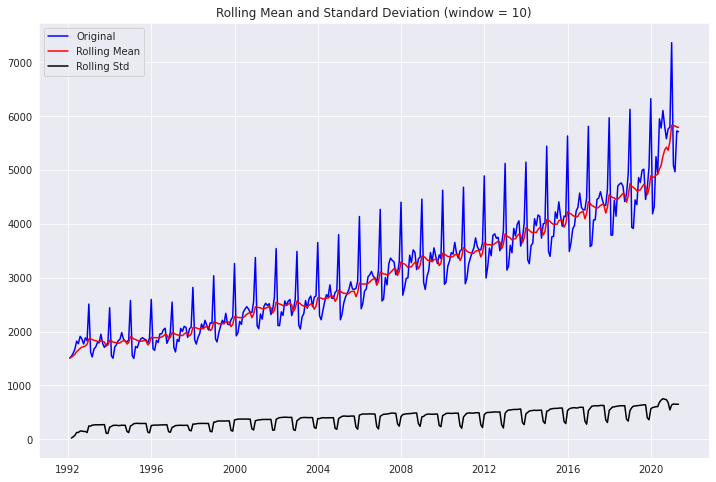

In [ ]:
plot_rolling(data_series,10)

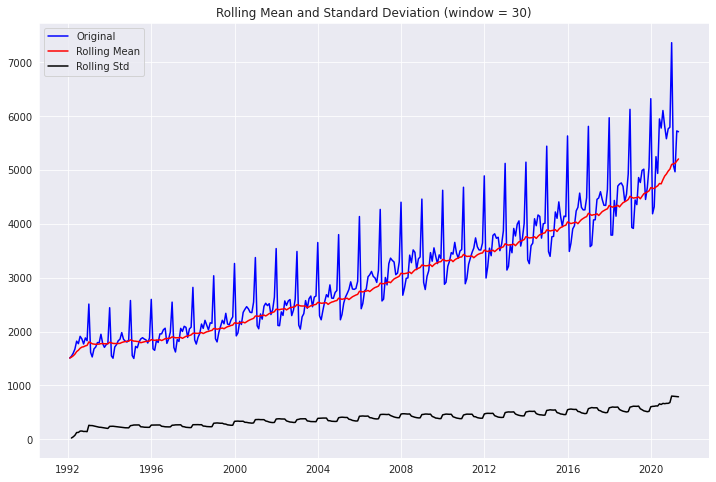

In [ ]:
plot_rolling(data_series,30)

In [ ]:
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()

    fig = plt.figure(figsize=(12,8))
    og_line = plt.plot(timeseries, color= 'blue', label = 'Original')
    exwm_line = plt.plot(expw_ma, color='red', label='EWMA')
    plt.legend(loc='best')
    plt.title('EWMA (alpha= '+str(alpha)+')')
    plt.show()

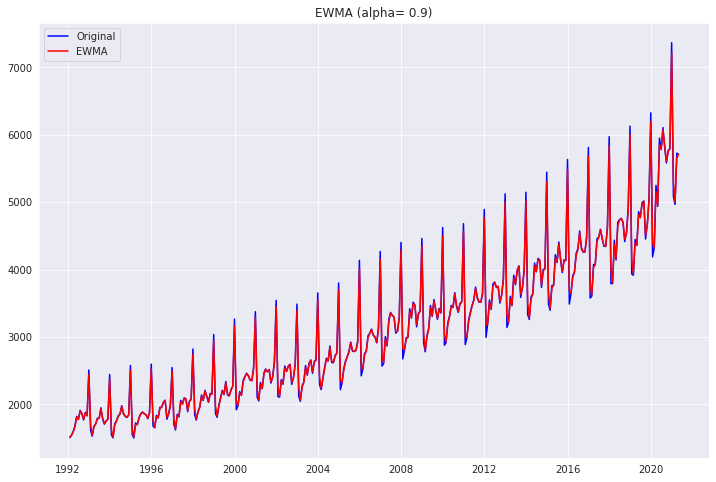

In [ ]:
plot_ewma(data_series, 0.9)

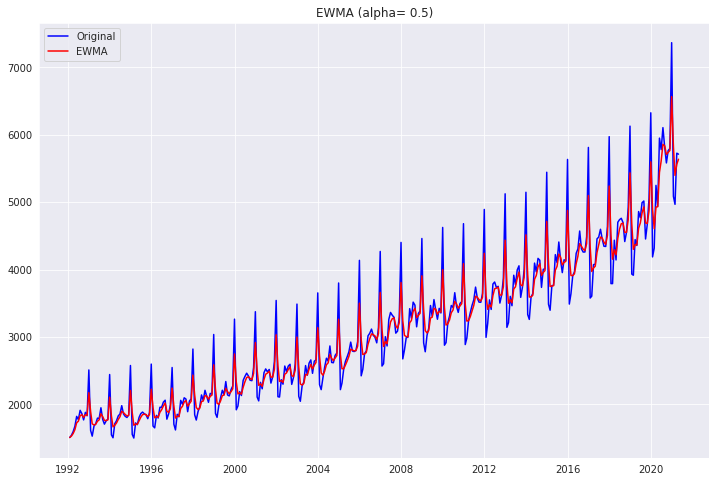

In [ ]:
plot_ewma(data_series, 0.5)

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

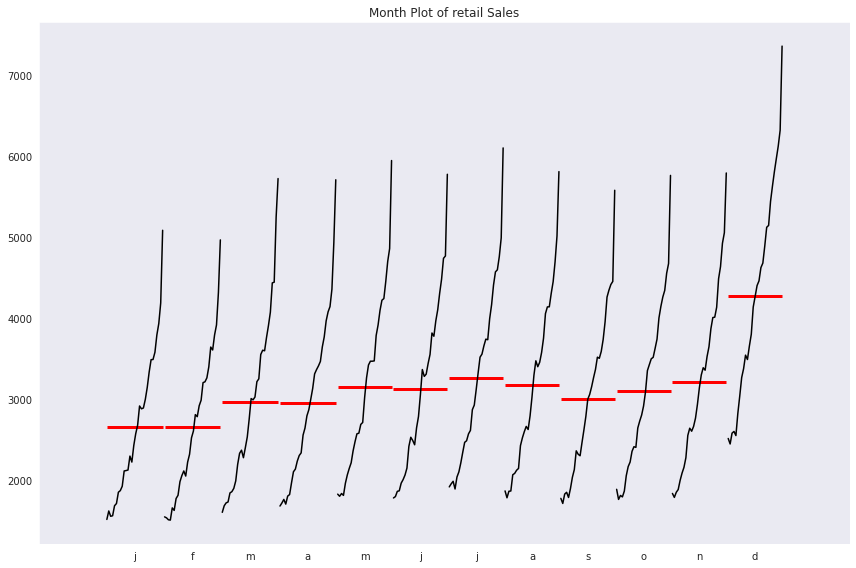

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(12,8))
month_plot(data_series, ax=ax1)
plt.title('Month Plot of retail Sales')
plt.grid(axis='both')
plt.tight_layout()

In [ ]:
data_series.head()

1992-01-31    1509
1992-02-29    1541
1992-03-31    1597
1992-04-30    1675
1992-05-31    1822
Freq: M, dtype: int64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
retail = seasonal_decompose(data_series)

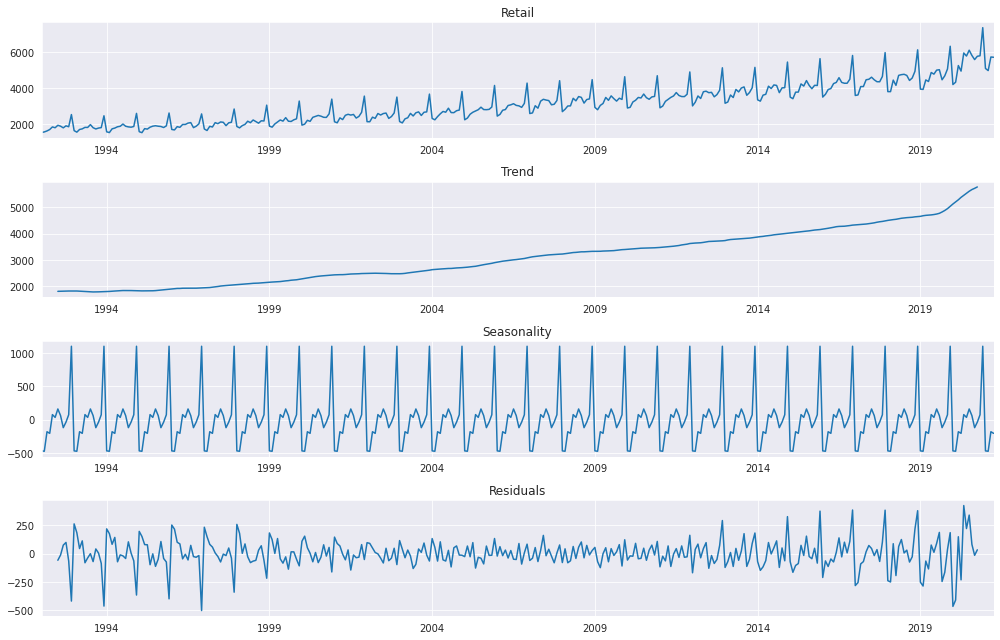

In [ ]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(14,9))
data_series.plot(ax=ax1)
retail.trend.plot(ax=ax2)
retail.seasonal.plot(ax=ax3)
retail.resid.plot(ax=ax4)
ax1.set_title('Retail')
ax2.set_title('Trend')
ax3.set_title('Seasonality')
ax4.set_title('Residuals')
plt.tight_layout()

There are still patterns in the residue of the forecasts

In [ ]:
retail_mul = seasonal_decompose(data_series, model='multiplicative')


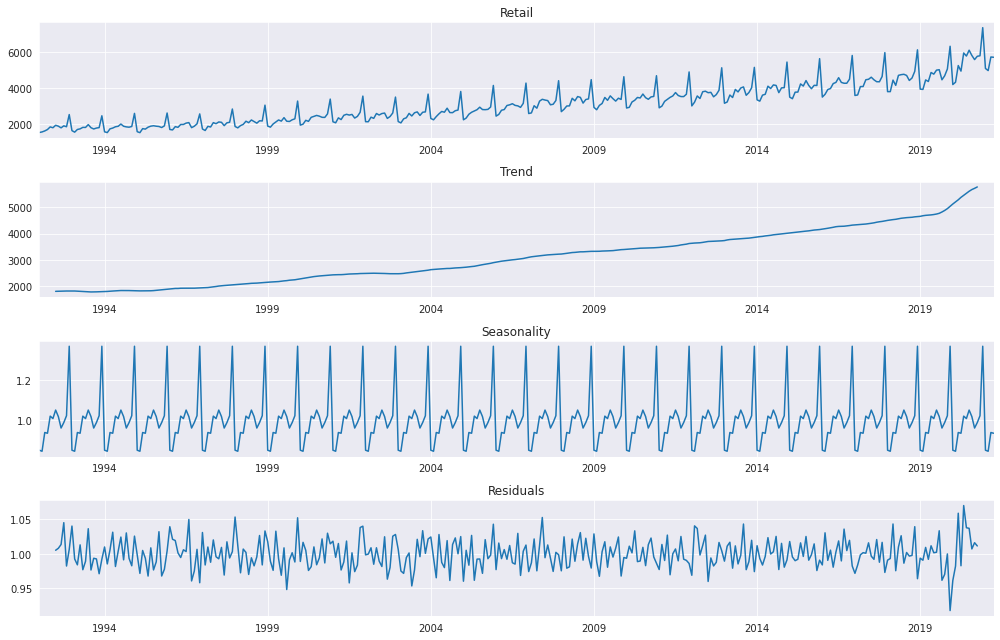

In [ ]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(14,9))
data_series.plot(ax=ax1)
retail_mul.trend.plot(ax=ax2)
retail_mul.seasonal.plot(ax=ax3)
retail_mul.resid.plot(ax=ax4)
ax1.set_title('Retail')
ax2.set_title('Trend')
ax3.set_title('Seasonality')
ax4.set_title('Residuals')
plt.tight_layout()

In [ ]:
! pip install --upgrade pip
! pip install kats

  Using cached pip-21.2.4-py3-none-any.whl (1.6 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.2
    Uninstalling pip-21.2.2:
      Successfully uninstalled pip-21.2.2
     |████████████████████████████████| 6.3 MB 23.0 MB/s 
     |████████████████████████████████| 844 kB 65.5 MB/s 
     |████████████████████████████████| 47 kB 9.6 MB/s 
     |████████████████████████████████| 64 kB 5.4 MB/s 
     |████████████████████████████████| 498 kB 61.9 MB/s 
     |████████████████████████████████| 142 kB 19.7 MB/s 
     |████████████████████████████████| 3.4 MB 64.2 MB/s 
     |████████████████████████████████| 67.3 MB 278 kB/s 
     |████████████████████████████████| 2.0 MB 63.2 MB/s 
     |████████████████████████████████| 5.4 MB 61.6 MB/s 
     |████████████████████████████████| 1.2 MB 58.4 MB/s 
     |████████████████████████████████| 26.3 MB 54.2 MB/s 
     |████████████████████████████████| 475 kB 61.4 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none

In [ ]:
# pip install kats

In [ ]:
from kats.consts import TimeSeriesData
df = data.rename(columns={"DATE": "time", "Sales": "value"})
ts = TimeSeriesData(df)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: numpy.core.multiarray failed to import

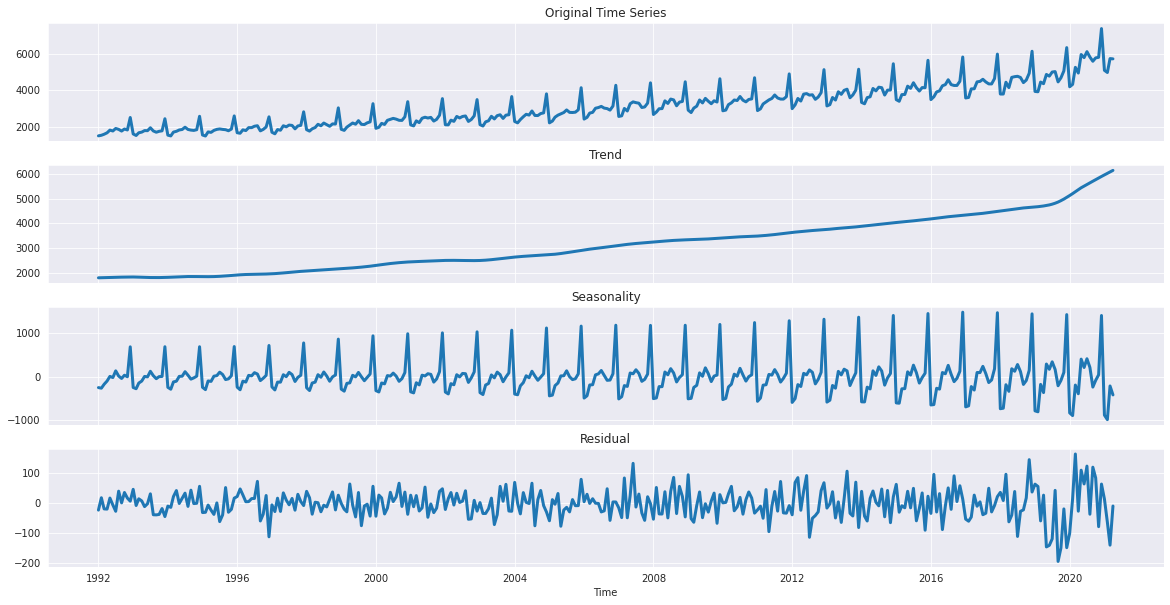

In [ ]:
from kats.utils.decomposition import TimeSeriesDecomposition

decomposer = TimeSeriesDecomposition(ts, decomposition="additive")
results = decomposer.decomposer()
fig = decomposer.plot()

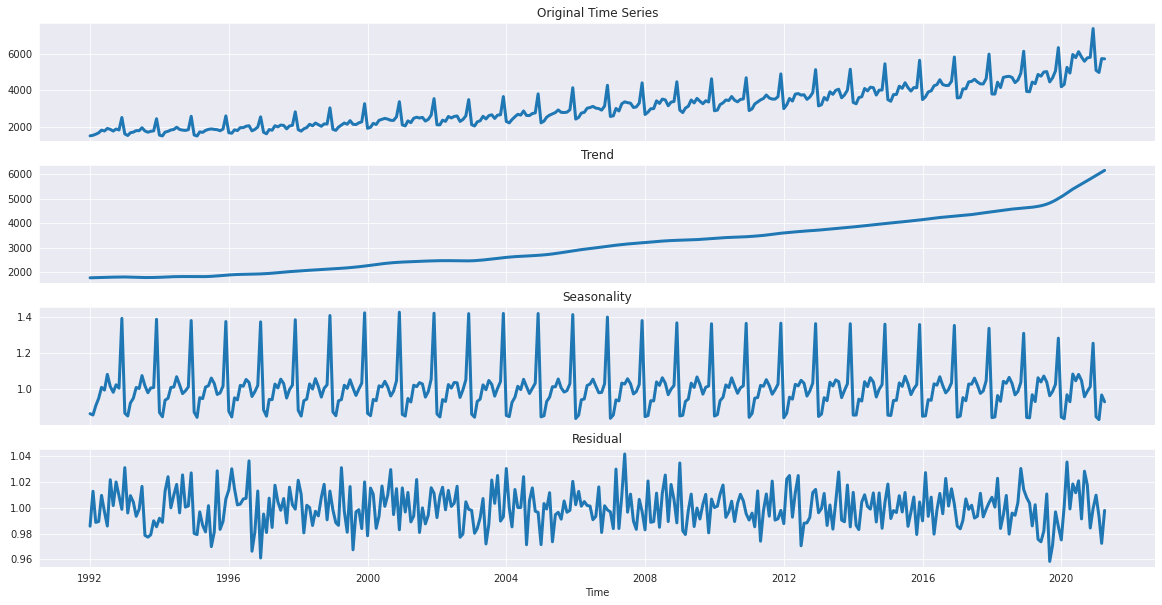

In [ ]:
decomposer = TimeSeriesDecomposition(ts, decomposition="multiplicative")
results = decomposer.decomposer()
fig = decomposer.plot()

In [ ]:
from kats.detectors.seasonality import FFTDetector

fft_detector = FFTDetector(ts)
fft_detector.detector()

{'seasonality_presence': False, 'seasonalities': []}

TimeSeriesChangePoint(start_time: 2007-04-01 00:00:00, end_time: 2007-04-01 00:00:00, confidence: 1.0)


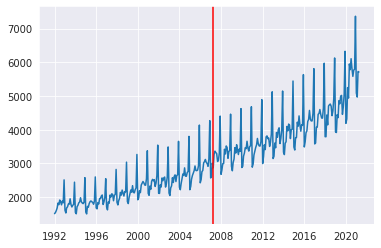

In [ ]:
from kats.detectors.cusum_detection import CUSUMDetector

cumsum_detector = CUSUMDetector(ts)
changepoints = cumsum_detector.detector()
print(changepoints[0][0])

# Plot
cumsum_detector.plot(changepoints)

TimeSeriesChangePoint(start_time: 2020-05-01T00:00:00.000000000, end_time: 2020-05-01T00:00:00.000000000, confidence: 0.7075252873104964)


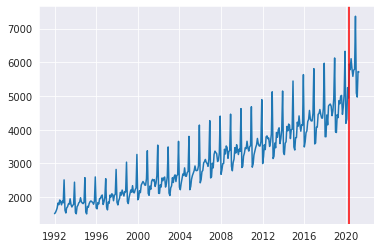

In [ ]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

bocpd_detector = BOCPDetector(ts)

changepoints = bocpd_detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, changepoint_prior=0.01
)
for changepoint in changepoints:
    print(changepoint[0])
    
# Plot
bocpd_detector.plot(changepoints)

In [ ]:
ts

,time,value
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
347,2020-12-01,7366
348,2021-01-01,5087
349,2021-02-01,4968
350,2021-03-01,5727


In [ ]:
data_to_use = data_series[data_series.index < '2020-05-31']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    352 non-null    object
 1   Sales   352 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
data_to_use.tail()

2019-12-31    6326
2020-01-31    4188
2020-02-29    4318
2020-03-31    5249
2020-04-30    4938
Freq: M, dtype: int64

In [ ]:
from kats.detectors.outlier import OutlierDetector

outlier_detector = OutlierDetector(ts, "multiplicative")

outlier_detector.detector()
outliers = outlier_detector.outliers
outliers[0]

[Timestamp('1999-12-01 00:00:00'),
 Timestamp('2001-12-01 00:00:00'),
 Timestamp('2002-12-01 00:00:00'),
 Timestamp('2003-12-01 00:00:00'),
 Timestamp('2004-12-01 00:00:00'),
 Timestamp('2005-12-01 00:00:00'),
 Timestamp('2006-12-01 00:00:00'),
 Timestamp('2007-12-01 00:00:00'),
 Timestamp('2008-12-01 00:00:00'),
 Timestamp('2009-12-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2011-12-01 00:00:00'),
 Timestamp('2012-12-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-12-01 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00')]

In [ ]:
ts_day_outliers_interpolated = outlier_detector.remover(interpolate=True)

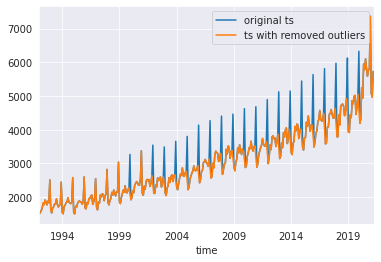

In [ ]:
from matplotlib import pyplot as plt

ax = ts.to_dataframe().plot(x="time", y="value")
ts_day_outliers_interpolated.to_dataframe().plot(x="time", y="y_0", ax=ax)
plt.legend(labels=["original ts", "ts with removed outliers"])
plt.show()


In [ ]:
data_to_use = pd.DataFrame(data_to_use).reset_index()
data_to_use.head()

,index,0
0,1992-01-31,1509
1,1992-02-29,1541
2,1992-03-31,1597
3,1992-04-30,1675
4,1992-05-31,1822


In [ ]:
data_to_use['index'] = data_to_use['index'].dt.date
df = data_to_use.rename(columns={"index": "time", "0": "value"})
ts = TimeSeriesData(df)

In [ ]:
from kats.models.prophet import ProphetModel, ProphetParams

# Specify parameters
params = ProphetParams(seasonality_mode="multiplicative")

# Create a model instance
m = ProphetModel(ts, params)

# Fit mode
m.fit()

# Forecast
fcst = m.predict(steps=12, freq="M")
print(fcst)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -2.93903
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1278.08   0.000770869       359.209           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1284.12   0.000486979       392.113      0.7615     0.07615      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221        1284.6   0.000224822       183.935   2.141e-06       0.001      327  LS failed, Hessian reset 
     299       1285.99   0.000411437       194.901           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358     

<AxesSubplot:xlabel='time', ylabel='y'>

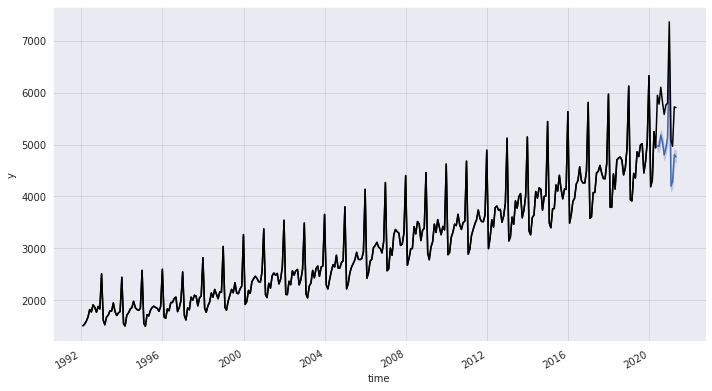

In [ ]:
m.plot()
data_series.plot(color='black')



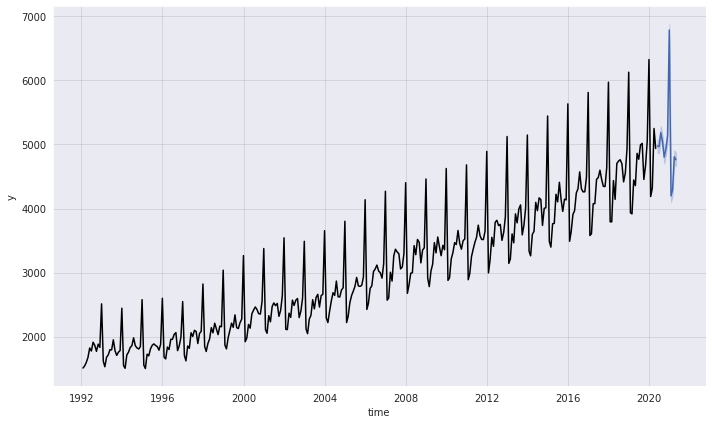

In [ ]:
m.plot()

In [ ]:
! pip install pycausalimpact

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from causalimpact import CausalImpact


In [ ]:
# Define training data - period prior to the event
pre_period = ['1992-01-01', '2020-04-01'] 
# Define post-event period - i.e. time AFTER the event occurred.
post_period = ['2020-05-01', '2021-04-01'] 
# Instantiate CI model.
ci = CausalImpact(data['Sales'], pre_period, post_period)



In [ ]:
ci.plot()

AttributeError: 'CausalImpact' object has no attribute 'inferences'

<Figure size 1080x864 with 0 Axes>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78737810-407f-49e2-ad32-0363e2fb2f04' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>